In [290]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image, display
import random


class Scorelogger():
    
    #Takes in a list of files and creates the scorelogger
    def __init__(self,files:list):
        self.pics_df = None
        self.pics_emotions_df = None
        self.pics_files = files
        self.pics_dict = {}
        self.pics_emotions_dict = {}
        self.pics_list = []
        self.pics_finished = []
        self.emotions_dict = {'a':'happy','b':'timid','c':'sad','d':'playful','e':'mean','f':'content','g':'scared'}
        self.name = ''
        self.preference = ''
    
    #Populates the score df and emotion df with the pictures
    def populate_initial_dfs(self):
        for file in self.pics_files:
            self.pics_dict[file] = []
            self.pics_emotions_dict[file] = []
            self.pics_list.append(file)
        pics = pd.DataFrame(files,columns = ['Path'],index = files)
        self.pics_df = pics.T
    
    #Enters the users score into the dictionary for the appropriate pet
    def enter_score(self,pic:str,score:int):
        self.pics_dict[pic].append(int(score))
        
    #Enters the pet's emotion into the dictionary for the appropriate pet
    def enter_emotion(self,pic:str,emotion:str):
        self.pics_emotions_dict[pic].append(self.emotions_dict[emotion])
        
    #Randomly generate one of the pets from the list
    def _generate_random_pic_name(self) -> str:
        x = random.randint(0,len(self.pics_list)-1)
        pic = self.pics_list.pop(x)
        self.pics_finished.append(pic)
        return pic
        
    #Generates the image of the pet
    def generate_image(self,pic = None)-> Image:
        if pic:
            return display(Image(filename = pic))
        else:
            name = self._generate_random_pic_name()
            return display(Image(filename = name))
        
    #After the user is done, this turns the dictionaries that have been keeping track into dataframes
    def _turn_dict_into_df(self):
        self.pics_df = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in self.pics_dict.items()]))
        self.pics_emotions_df = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in self.pics_emotions_dict.items()]))
        
    #Adds the users name to the dataframes
    def _add_name_and_preference_to_df(self):
        self.pics_df['Name'] = self.name
        self.pics_emotions_df['Name']=self.name
        self.pics_df['Preference'] = self.preference
        self.pics_emotions_df['Preference'] = self.preference
        
    #Send results to csv
    def _send_to_csv(self):
        try:
            file = pd.read_csv('Pet_scores.csv')
            file1 = pd.read_csv('Pet_emotions.csv')
            if 'Unnamed: 0' in file.columns:
                file.drop('Unnamed: 0',inplace = True,axis = 1)
            if 'Unnamed: 0' in file1.columns:
                file1.drop('Unnamed: 0',inplace = True,axis = 1)
            if self.name in file.Name.values:
                file.update(self.pics_df,overwrite=False)
                file1.update(self.pics_emotions_df,overwrite=False)
                score = file
                emotion = file1
            else:
                score = pd.concat([file, self.pics_df], ignore_index=True,sort=True)
                emotion = pd.concat([file1, self.pics_emotions_df], ignore_index=True,sort=True)
            score.to_csv('Pet_scores.csv')
            emotion.to_csv('Pet_emotions.csv')
        except FileNotFoundError:
            self.pics_df.to_csv('Pet_scores.csv')
            self.pics_emotions_df.to_csv('Pet_emotions.csv')
            
    #Ends the user's interactive session  
    def end_session(self):
        print('Thank you for your time!')
        print('Please give the program a minute to save your answers... (will say "all done" when finished)')
        print('...')
        self._turn_dict_into_df()
        print('...')
        self._add_name_and_preference_to_df()
        print('...')
        self._send_to_csv()
        print('All done thank you!')
    
    #Begins the user's interactive session
    def activate_session(self):
        
        self.populate_initial_dfs()
        name = 'start_name'
        while not self.valid_name_input(name):
            
            name = input('Please enter your first and last name: ').lower()
            self.name = name
        
        print('_________________________________________________________________________________________________') 
        preference = 'start_preference'
        while not self.valid_preference_input(preference):
            preference = input('Do you prefer cats or dogs or both? ').lower()
            self.preference = preference
        
        print('\nYou will be ranking pets on a scale from 1-10 (10 is cutest)')
        print('If more than one pet is in the picture, put the average of all of them')
        print('At any time, you may type "x" into the bar to quit and save your progress\n')
        input('Press enter to get started!')
        
        while len(self.pics_list)>0:
            pet = self._generate_random_pic_name()
            self.generate_image(pet)
            score = 999
            emotion = ''
            while not self.valid_score_input(score):
                
                score = input("Please rank the cuteness (1-10): ").lower()
            
                if score == "x":
                    self.end_session()
                    return
                
            self.enter_score(pet,score) 
                
            while not self.valid_emotional_input(emotion):
                emotion = input('Would you say this/these animals are: \n\tA)Happy\n\tB)Timid\n\tC)Sad\n\tD)Playful\n\tE)Mean\n\tF)Content\n\tG)Scared\n\t\n\t').lower()
                if emotion == "x":
                    self.end_session()
                    return
            print('_________________________________________________________________________________________________')
                
            self.enter_emotion(pet,emotion)
             
        self.end_session()
        return
     

    #Verify that name is valid
    def valid_name_input(self,name:str)-> bool:
        if name != 'start_name' and len(name.split())>0:
            return True
        else:
            if name != 'start_name':
                print('\nInvalid entry\n')
            return False    
    
    #Verify that preference is valid
    def valid_preference_input(self,preference:str)-> bool:
        if preference == 'dogs' or preference == 'cats' or preference == 'both':
            return True
        else:
            if preference != 'start_preference':
                print('\nInvalid entry, please put "cats" or "dogs"\n or "both\n"')
            return False
        
        
    #Verify if the emotion input is valid
    def valid_emotional_input(self,emotion:str)-> bool:
        valid_answers=['a','b','c','d','e','f','g']
        if emotion in valid_answers:
            return True
        else:
            if emotion != '':
                print('\nInvalid entry, please type one of A-G\n')
            return False
     
    #Verify if the score is valid
    def valid_score_input(self,score:str) -> bool:
        valid_answers = [i+1 for i in range(10)]
        try:
            score = int(score)
            if score in valid_answers:
                return True
            else:
                if score != 999:
                    print('\nInvalid entry\n')
                return False
        except ValueError:
            if score != 999:
                print('\nInvalid entry\n')
            return False

#Filter out the files that have already been ranked
def filter_out_ranked_files() -> list:
    file = pd.read_csv('Pet_scores.csv')
    file1 = pd.read_csv('Pet_emotions.csv')
    if 'Unnamed: 0' in file.columns:
        file.drop('Unnamed: 0',inplace = True,axis = 1)
        file.drop('Name',inplace = True,axis = 1)
        file.drop('Preference',inplace = True,axis = 1)
        file.drop('Tester', inplace = True, axis = 1)
    if 'Unnamed: 0' in file1.columns:
        file1.drop('Unnamed: 0',inplace = True,axis = 1)
        file1.drop('Name',inplace = True,axis = 1)
        file1.drop('Preference',inplace = True,axis = 1)
        file1.drop('Tester', inplace = True, axis = 1)
    filtered_list = file.columns[file.isna().any()].tolist()
    return filtered_list

# Filter responses by tester in order to print out how much each person has ranked
def filter_by_tester()-> pd.DataFrame:
    
    file = pd.read_csv('Pet_scores.csv')
    file1 = pd.read_csv('Pet_emotions.csv')
    if 'Unnamed: 0' in file.columns:
        file.drop('Unnamed: 0',inplace = True,axis = 1)
    if 'Unnamed: 0' in file1.columns:
        file1.drop('Unnamed: 0',inplace = True,axis = 1)
    valid_names = ['quan','henry','matthew','vicky','kevin']
    name = 'start_name'
    while name not in valid_names:
        name = input('Count how many records you have recorded by entering your first name: ').lower()    
    filtered = file[file['Tester']==name]
    filtered = filtered.T[:][3:]
    print('\n\nThe number of pictures that {} has ranked is {} \n The total amount ranked is {} out of {}'.format(name,len(filtered.columns[filtered.notna().any()].tolist())-1,len(file.columns[file.notna().any()].tolist())-1,len(file.columns)-1))

# After test, filter responses by catlovers
def filter_by_catlovers(df:pd.DataFrame)-> pd.DataFrame:
    df = df[(df['Preference'] == 'cats')|(df['Preference']=='both')] 
    df = df.T
    df.columns = df.iloc[1]
    df = df[4:]
    df.dropna(how = 'all',inplace = True)
    return df

# After test, filter responses by doglovers
def filter_by_doglovers(df:pd.DataFrame)-> pd.DataFrame:
    df = df[(df['Preference'] == 'dogs')|(df['Preference']=='both')]
    df = df.T
    df.columns = df.iloc[1]
    df = df[4:]
    df.dropna(how = 'all',inplace = True)
    return df

# After test, filter responses by both cat lovers and dog lovers
def filter_by_all(df:pd.DataFrame)-> pd.DataFrame:
    df = df[(df['Preference'] == 'dogs')|(df['Preference']=='cats')|(df['Preference']=='both')] 
    df = df.T
    df.columns = df.iloc[1]
    df = df[4:]
    return df

### Begin Session (Press Shift and Enter on cell below, Press x when finished)

In [155]:
##### files = pd.read_csv('10k_files.csv').files.values.tolist()
files = filter_out_ranked_files()
session = Scorelogger(files)
session.activate_session()


KeyboardInterrupt: 

### Check how many pictures have been rated

In [9]:
file = pd.read_csv('Pet_Scores.csv')
file.T[47][4:].mean()

3.4285714285714284

In [278]:
filter_by_tester()

Count how many records you have recorded by entering your first name: vicky


The number of pictures that vicky has ranked is 107 
 The total amount ranked is 1184 out of 10004


In [420]:
#BEGIN
train = pd.read_csv('updated_train.csv',encoding = "ISO-8859-1")
file = pd.read_csv('Pet_scores.csv')
scores = file.loc[:,file.notna().any()]

#Choice of filter
scores = filter_by_all(scores)
scores
    
#scores = filter_by_doglovers(scores)

Name,matthew littman,paige halas,sonal mendiratta,shan pillaiyan,teng-yun chung,addy dam,ryan luu,miriam poliner,rijul banerjee,qq,...,sharon lee,daniel manalo,austin bui,cindy nguyen,runhao wang,celia,zhao yun,bailianz zhou,quan q,xiaoyang chen
train_images/00156db4a-1.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
train_images/002230dea-1.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
train_images/00a1f270a-2.jpg,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
train_images/0157cf3a4-2.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
train_images/015da9e87-1.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
train_images/ffb6a7f5d-4.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
train_images/ffb6a7f5d-5.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
train_images/ffd697903-1.jpg,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
train_images/ffe2090b3-6.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [421]:
# Without Bias checker
scores = scores.T
scores = scores.loc[:,scores.notna().any()].mean()

means = pd.DataFrame(scores)
means
grouped = means.groupby(means.index.str[13:22])
aggregated = []
for i,j in grouped:
    aggregated.append((i,j.mean().values[0]))
    
filtered_scores = pd.DataFrame(aggregated)
filtered_scores.columns = ['PetID','PetScore']
filtered_scores


,PetID,PetScore
0,00156db4a,5.666667
1,002230dea,4.000000
2,00a1f270a,1.000000
3,0157cf3a4,1.000000
4,015da9e87,4.000000
...,...,...
1698,ff498c903,5.333333
1699,ffb6a7f5d,6.500000
1700,ffd697903,2.000000
1701,ffe2090b3,10.000000


In [422]:
# ##THIS WHOLE PART tries to return the skewed responses towardds the mean
# means_dict = scores.mean().transform(lambda x: x-5).round().to_dict()

# new_series = []
# for i in scores:
#     new = scores[i].map(lambda x: x - means_dict[i],na_action = 'ignore')
#     new_series.append(new)
# new_df = pd.DataFrame(new_series)
# new_df
# scores = new_df.loc[:,new_df.notna().any()].mean()
# means = pd.DataFrame(scores)
# grouped = means.groupby(means.index.str[13:22])
# aggregated = []
# for i,j in grouped:
#     aggregated.append((i,j.mean().values[0]))
    
# filtered_scores = pd.DataFrame(aggregated)
# filtered_scores.columns = ['PetID','PetScore']
# filtered_scores

In [423]:
#BEGIN
train = pd.read_csv('updated_train.csv',encoding = "ISO-8859-1")
file = pd.read_csv('Pet_emotions.csv')
scores = file.loc[:,file.notna().any()]

#Choice of filter
scores = filter_by_all(scores)
scores = scores.T
scores



,train_images/00156db4a-1.jpg,train_images/002230dea-1.jpg,train_images/00a1f270a-2.jpg,train_images/0157cf3a4-2.jpg,train_images/015da9e87-1.jpg,train_images/015da9e87-4.jpg,train_images/015fdb354-5.jpg,train_images/0162634c2-2.jpg,train_images/0173c456c-4.jpg,train_images/018188075-3.jpg,...,train_images/ff125cf8d-1.jpg,train_images/ff498c903-1.jpg,train_images/ff498c903-2.jpg,train_images/ff498c903-3.jpg,train_images/ffb6a7f5d-1.jpg,train_images/ffb6a7f5d-4.jpg,train_images/ffb6a7f5d-5.jpg,train_images/ffd697903-1.jpg,train_images/ffe2090b3-6.jpg,train_images/fffd78a11-1.jpg
Name,,,,,,,,,,,,,,,,,,,,,
matthew littman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,content,NaN,NaN
paige halas,NaN,NaN,content,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sonal mendiratta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shan pillaiyan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
teng-yun chung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
celia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zhao yun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bailianz zhou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [424]:
# Without Bias checker
emotions_dict = {}
for score in scores:
    emotions_list = []
    emotions_list.append(scores[scores[score].notna()][score].values)
    score = score[13:22]
    emotions_dict[score] = emotions_list


emotions = pd.DataFrame.from_dict(emotions_dict)

def all_same(items):
    return all(x == items[0] for x in items)

for i,j in enumerate(emotions):
    if emotions[j].str.len()[0] > 1:
        if all_same(emotions[emotions.columns[i]].tolist()[0]):
            emotions[j] = emotions[emotions.columns[i]].tolist()[0][0]
        else:
            emotions[j] = ','.join(sorted(np.unique(np.array(emotions[emotions.columns[i]].tolist()[0]))))   

emotions = emotions.applymap(lambda x: ''.join(x))
emotions = emotions.T


emotions.columns = ['Emotion']
emotions

,Emotion
00156db4a,"happy,sad"
002230dea,timid
00a1f270a,content
0157cf3a4,sad
015da9e87,scared
...,...
ff498c903,playful
ffb6a7f5d,sad
ffd697903,content
ffe2090b3,timid


In [425]:
filtered_scores = pd.merge(filtered_scores,emotions,left_on = ['PetID'],how = 'inner',left_index = False,right_index = True)

In [426]:
scores

,train_images/00156db4a-1.jpg,train_images/002230dea-1.jpg,train_images/00a1f270a-2.jpg,train_images/0157cf3a4-2.jpg,train_images/015da9e87-1.jpg,train_images/015da9e87-4.jpg,train_images/015fdb354-5.jpg,train_images/0162634c2-2.jpg,train_images/0173c456c-4.jpg,train_images/018188075-3.jpg,...,train_images/ff125cf8d-1.jpg,train_images/ff498c903-1.jpg,train_images/ff498c903-2.jpg,train_images/ff498c903-3.jpg,train_images/ffb6a7f5d-1.jpg,train_images/ffb6a7f5d-4.jpg,train_images/ffb6a7f5d-5.jpg,train_images/ffd697903-1.jpg,train_images/ffe2090b3-6.jpg,train_images/fffd78a11-1.jpg
Name,,,,,,,,,,,,,,,,,,,,,
matthew littman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,content,NaN,NaN
paige halas,NaN,NaN,content,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sonal mendiratta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shan pillaiyan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
teng-yun chung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
celia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zhao yun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bailianz zhou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [427]:
# train = pd.read_csv('train/train.csv')
# file1 = pd.read_csv('Pet_emotions.csv')
# file1 = file1[file1['Name']=='jesslyn antonio']
# # scores = file1.loc[:,file1.notna().any()]
# # means = pd.DataFrame(scores)

# # scores = scores.T
# # scores.columns = scores.iloc[1]
# # scores = scores[4:]
# # scores
# file1.T.dropna()

In [428]:
# train = pd.read_csv('train/train.csv')
# file = pd.read_csv('Pet_emotions.csv')
# emotions = file.loc[:,file.notna().any()]
# means = pd.DataFrame(emotions)


# print(means.iloc[])
# print(len(means[:][3]))
# # grouped = means.groupby(means.index.str[13:22])
# # aggregated = []
# # for i,j in grouped:
# #     print(i)
# #     print('------')
# #     print(j)
# #     aggregated.append((i,j.mean().values[0]))
    
# # filtered_scores = pd.DataFrame(aggregated)
# # filtered_scores.columns = ['PetID','PetScore']
# # filtered_scores

In [429]:
ten_k = pd.read_csv('10k_files.csv')
ten_k['files']= ten_k.files.str[13:22]
ten_k['files']=ten_k.files.drop_duplicates()
ten_k = ten_k.dropna()
ten_k


need_to_predict = []
for i in ten_k.files.values:
    if i in filtered_scores.PetID.values.tolist():
        pass
    else:
        need_to_predict.append(i)
need_to_predict

ten_k = pd.DataFrame(need_to_predict)
ten_k.columns = ['files']

In [430]:
train_old = train[train["PetID"].isin(ten_k.files.tolist())]
train_new = train[train['PetID'].isin(filtered_scores.PetID.tolist())]
#train_new
#train_new = train_new[train_new['Type']==2]
train_new


,Unnamed: 0,PetID,AdoptionSpeed,Type,Age,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,PhotoAmt,State,Breed,Colors
14,14,c02be41e6,2,1,3,2,2,2,3,3,3,1,1,0,0,2.0,41401,Mixed Breed,"Brown, Cream"
20,20,6436c1a59,2,1,12,2,2,2,2,1,1,1,1,0,0,7.0,41326,Mixed Breed,"Brown, White"
30,30,1a76190c5,3,1,4,3,1,2,1,1,1,1,2,0,0,5.0,41326,Mixed Breed,"Brown, White"
32,32,543130f60,4,1,24,1,2,1,1,1,2,1,5,0,0,1.0,41326,Mixed Breed,"Cream, White"
34,34,4c6fe4100,4,2,3,2,1,1,1,2,2,1,1,1,0,5.0,41327,Domestic Short Hair,"Black, White"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14966,14966,8dc7b3ffa,2,2,1,1,1,2,2,2,2,1,1,0,1,1.0,41326,Domestic Medium Hair,"Black, Brown"
14973,14973,941880ea3,2,1,2,2,2,2,2,2,2,1,1,0,0,5.0,41326,Mixed Breed,"Brown, White"
14975,14975,c7d02bfca,4,1,24,2,2,2,1,1,1,1,1,0,0,3.0,41327,Mixed Breed,"Brown, White"
14984,14984,f5dc70d35,4,1,60,2,2,2,3,3,3,1,1,0,0,1.0,41324,Mixed Breed,"Brown, Cream"


In [431]:
train_old

,Unnamed: 0,PetID,AdoptionSpeed,Type,Age,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,PhotoAmt,State,Breed,Colors
1,1,6296e909a,0,2,1,1,2,2,3,3,3,1,1,0,0,2.0,41401,Domestic Medium Hair,"Black, Brown"
2,2,3422e4906,3,1,1,1,2,2,1,1,2,1,1,0,0,7.0,41326,Mixed Breed,"Brown, White"
25,25,cf7d3eec0,2,2,36,1,3,2,1,1,1,1,1,0,0,3.0,41326,Mixed Breed,Golden
29,29,d341fbfd6,2,2,1,2,1,1,2,1,2,1,1,0,0,1.0,41327,Domestic Short Hair,"Brown, White"
31,31,edb920079,1,2,1,1,1,1,2,2,2,1,1,0,0,1.0,41361,Domestic Short Hair,Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14977,14977,472e86a83,4,2,3,2,1,2,2,2,2,1,1,0,0,2.0,41326,Calico,"Black, Brown"
14978,14978,ac6d69d99,4,1,4,2,2,1,1,1,1,1,1,0,0,5.0,41401,Mixed Breed,Brown
14982,14982,54b6c1d72,3,2,2,2,2,1,2,1,2,1,3,0,0,16.0,41336,Domestic Short Hair,"Black, Yellow"
14983,14983,cca88204d,2,1,3,1,2,2,1,1,2,1,1,0,0,7.0,41326,Mixed Breed,"Black, Brown"


In [432]:
train_old.to_csv('to_predict.csv')

In [311]:
merged = pd.merge(train_new,filtered_scores,on=['PetID'],how = 'inner')

In [312]:
merged

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,PetScore,Emotion
0,1,Lost Dog,3,307,0,2,2,5,7,2,...,0,41401,b609c40c6c840db208b149a19b856f86,0,"Lost Dog Found (Bandar Menjalara, Kepong¥_Tam...",c02be41e6,2,2,7.000,sad
1,1,Godiva,12,307,0,2,2,7,0,2,...,0,41326,a042471e0f43f2cf707104a1a138a7df,0,Godiva was rescued in Serdang residential area...,6436c1a59,7,2,6.125,happy
2,1,Benji & Kimi,4,205,218,3,2,7,0,1,...,0,41326,aa66486163b6cbc25ea62a34b11c9b91,0,Benji and his sister Kimi are a handsome pair ...,1a76190c5,5,3,7.000,happy
3,2,Kitten Girl Girl,3,266,0,2,1,7,0,1,...,1,41327,6e4f4078c85aaa01b4059fbf679e6695,0,Open for adoption!!!,4c6fe4100,5,4,6.000,playful
4,1,Lollipop,72,307,0,2,2,7,0,2,...,0,41326,c9a898071102b4fc7d485be4ff0e35d9,0,"She is a calm, gentle, good-mannered, friendly...",ea159d8da,3,4,7.000,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,1,Single Puppy Ipoh,2,307,0,2,2,0,0,2,...,0,41330,60689896aa0edff3a4f05b890bdafd26,0,Hi my cousin.found this puppy alone on the roa...,dabcf0e55,7,1,8.000,sad
1398,1,Toto,13,195,307,2,1,6,7,2,...,0,41326,a9201759b7a52aa9e6c51d9dbf6465e6,0,Toto is just over a year. She was found injure...,3ef9ac2a6,3,3,6.000,timid
1399,2,Comot,1,303,0,2,1,2,7,1,...,0,41326,66044942690776d858708bfc7c166078,1,stray kitten together with 4 other siblings. n...,91bcb5a0a,2,2,8.000,"scared,timid"
1400,2,Belang,1,265,0,1,1,2,0,1,...,0,41326,66044942690776d858708bfc7c166078,1,stray kitten together with 4 other siblings. n...,8dc7b3ffa,1,2,6.000,content


In [313]:
merged
merged.to_csv('doglovers_data_with_cute.csv')

In [186]:
merged.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed',
       'PetScore'],
      dtype='object')

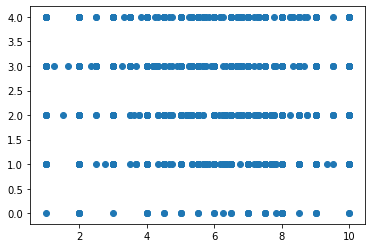

In [203]:
import matplotlib.pyplot as plt

plt.scatter(merged.PetScore,merged.AdoptionSpeed)

In [205]:
merged_new = merged.iloc[:,20:]


# Before the Bias checker

6.140070921985815


,PhotoAmt,AdoptionSpeed,PetScore
count,47.000000,47.0,47.000000
mean,5.234043,0.0,6.140071
std,4.607238,0.0,2.341736
min,1.000000,0.0,1.000000
25%,3.000000,0.0,4.500000
50%,5.000000,0.0,7.000000
75%,5.000000,0.0,8.000000
max,27.000000,0.0,10.000000


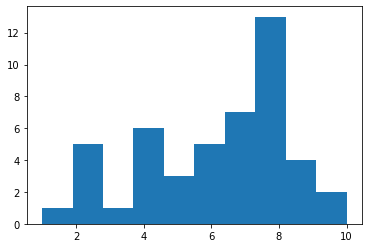

In [206]:
merged_speed = merged_new[merged_new['AdoptionSpeed']==0]
print(merged_speed.PetScore.mean())
plt.hist(merged_speed.PetScore)
merged_speed.describe()

6.29284094590217


,PhotoAmt,AdoptionSpeed,PetScore
count,343.000000,343.0,343.000000
mean,4.204082,1.0,6.292841
std,2.885594,0.0,2.081582
min,1.000000,1.0,1.000000
25%,3.000000,1.0,5.000000
50%,4.000000,1.0,6.500000
75%,5.000000,1.0,8.000000
max,26.000000,1.0,10.000000


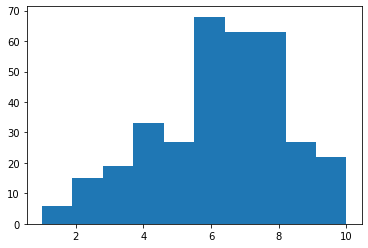

In [207]:
merged_speed = merged_new[merged_new['AdoptionSpeed']==1]
print(merged_speed.PetScore.mean())
plt.hist(merged_speed.PetScore)
merged_speed.describe()
#merged_new.corr(method ='pearson') 

6.335535230352303


,PhotoAmt,AdoptionSpeed,PetScore
count,492.000000,492.0,492.000000
mean,4.949187,2.0,6.335535
std,3.640609,0.0,2.066350
min,1.000000,2.0,1.000000
25%,3.000000,2.0,5.000000
50%,4.000000,2.0,6.500000
75%,5.250000,2.0,8.000000
max,30.000000,2.0,10.000000


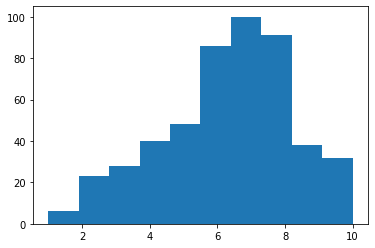

In [208]:
merged_speed = merged_new[merged_new['AdoptionSpeed']==2]
print(merged_speed.PetScore.mean())
plt.hist(merged_speed.PetScore)
merged_speed.describe()

6.009979148048853


,PhotoAmt,AdoptionSpeed,PetScore
count,373.000000,373.0,373.000000
mean,5.908847,3.0,6.009979
std,4.523208,0.0,2.139810
min,1.000000,3.0,1.000000
25%,3.000000,3.0,4.875000
50%,5.000000,3.0,6.000000
75%,7.000000,3.0,7.333333
max,30.000000,3.0,10.000000


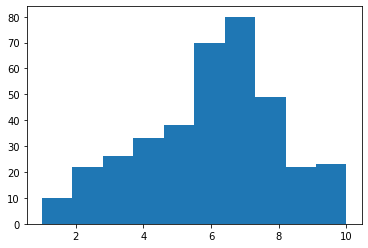

In [209]:
merged_speed = merged_new[merged_new['AdoptionSpeed']==3]
print(merged_speed.PetScore.mean())
plt.hist(merged_speed.PetScore)
merged_speed.describe()

5.854503464203233


,PhotoAmt,AdoptionSpeed,PetScore
count,433.000000,433.0,433.000000
mean,4.709007,4.0,5.854503
std,3.692251,0.0,2.015860
min,1.000000,4.0,1.000000
25%,3.000000,4.0,4.500000
50%,4.000000,4.0,6.000000
75%,5.000000,4.0,7.000000
max,30.000000,4.0,10.000000


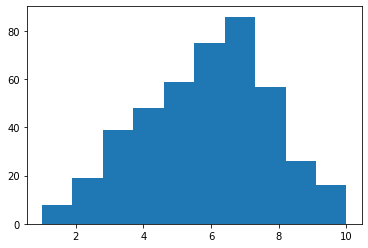

In [210]:
merged_speed = merged_new[merged_new['AdoptionSpeed']==4]
print(merged_speed.PetScore.mean())
plt.hist(merged_speed.PetScore)
merged_speed.describe()

# Started to use the bias checker

In [163]:
merged_new = merged.iloc[:,20:]


5.0473013048635815


(array([13., 16., 30., 41., 67., 55., 27., 17., 11.,  4.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

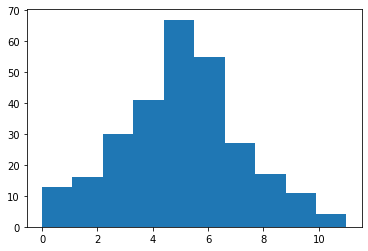

In [164]:
merged_speed = merged_new[merged_new['AdoptionSpeed']==1]
print(merged_speed.PetScore.mean())
plt.hist(merged_speed.PetScore)

#merged_new.corr(method ='pearson') 

5.095400165016502


(array([  4.,  12.,  17.,  44.,  86., 156.,  36.,  24.,  16.,   9.]),
 array([-1. ,  0.2,  1.4,  2.6,  3.8,  5. ,  6.2,  7.4,  8.6,  9.8, 11. ]),
 <a list of 10 Patch objects>)

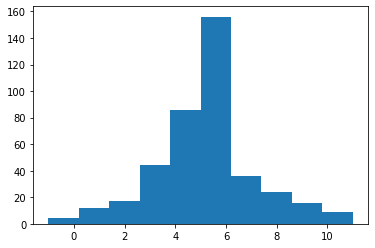

In [165]:
merged_speed = merged_new[merged_new['AdoptionSpeed']==2]
print(merged_speed.PetScore.mean())
plt.hist(merged_speed.PetScore)

4.928066037735849


(array([ 6.,  8., 22., 42., 53., 71., 54., 29., 10., 23.]),
 array([-1. ,  0.1,  1.2,  2.3,  3.4,  4.5,  5.6,  6.7,  7.8,  8.9, 10. ]),
 <a list of 10 Patch objects>)

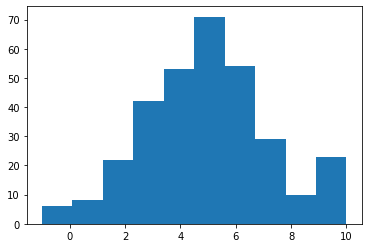

In [166]:
merged_speed = merged_new[merged_new['AdoptionSpeed']==3]
print(merged_speed.PetScore.mean())
plt.hist(merged_speed.PetScore)

4.695833333333334


(array([ 2.,  6., 30., 71., 75., 64., 69., 22.,  7., 14.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

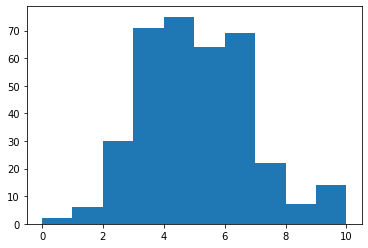

In [167]:
merged_speed = merged_new[merged_new['AdoptionSpeed']==4]
print(merged_speed.PetScore.mean())
plt.hist(merged_speed.PetScore)

In [303]:
file.T.iloc[4:,1].mean()

3.5833333333333335

In [304]:
file

,Unnamed: 0,Name,Preference,Tester,train_images/0011d7c25-1.jpg,train_images/0011d7c25-2.jpg,train_images/0011d7c25-3.jpg,train_images/00156db4a-1.jpg,train_images/00156db4a-2.jpg,train_images/00156db4a-3.jpg,...,train_images/ffe2090b3-1.jpg,train_images/ffe2090b3-2.jpg,train_images/ffe2090b3-4.jpg,train_images/ffe2090b3-5.jpg,train_images/ffe2090b3-6.jpg,train_images/fff6f2f61-1.jpg,train_images/fffa39a6a-1.jpg,train_images/fffa39a6a-2.jpg,train_images/fffd78a11-1.jpg,train_images/fffd78a11-2.jpg
0,0,matthew littman,dogs,matthew,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,paige halas,dogs,matthew,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,sonal mendiratta,both,matthew,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,shan pillaiyan,both,matthew,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,teng-yun chung,dogs,matthew,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,addy dam,dogs,matthew,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,ryan luu,both,matthew,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,miriam poliner,both,matthew,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,rijul banerjee,cats,matthew,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,qq,cats,quan,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [306]:
file.T.iloc[4:,0].mean()

5.132530120481928

In [323]:
file = pd.read_csv('Pet_scores.csv')

In [324]:
len(file)

38

In [326]:
file.T.iloc[4:,37].count()

98

(array([ 1.,  4.,  6., 10., 18., 21., 21., 13.,  3.,  1.]),
 array([1.0, 1.9, 2.8, 3.7, 4.6, 5.5, 6.4, 7.3, 8.2, 9.1, 10.0],
       dtype=object),
 <a list of 10 Patch objects>)

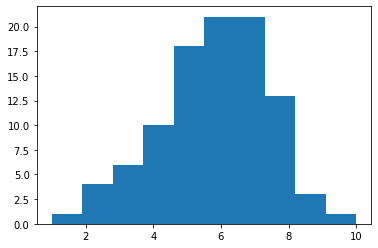

In [329]:
e = file.T.iloc[4:,37]
plt.hist(e)

In [321]:
p = file[file['Tester']=='henry']
p = p.T.iloc[4:]
for i in p.columns:
    print(p[i].value_counts())

7.0     14
8.0      8
9.0      4
6.0      4
10.0     3
5.0      2
4.0      1
3.0      1
2.0      1
Name: 20, dtype: int64
7.0     14
8.0      5
9.0      3
10.0     2
4.0      2
6.0      1
3.0      1
Name: 21, dtype: int64
7.0     20
5.0     13
8.0      7
6.0      7
10.0     2
1.0      2
9.0      1
4.0      1
3.0      1
Name: 22, dtype: int64
7.0    20
6.0    18
8.0     8
9.0     7
5.0     2
4.0     2
Name: 23, dtype: int64
6.0     15
8.0     12
7.0     12
9.0      6
10.0     3
5.0      2
4.0      2
3.0      2
Name: 24, dtype: int64
7.0     25
8.0     23
6.0     16
9.0      3
4.0      3
5.0      2
10.0     1
3.0      1
Name: 25, dtype: int64
7.0     23
8.0     10
6.0     10
4.0      6
5.0      4
3.0      3
10.0     2
9.0      2
Name: 26, dtype: int64
8.0     23
7.0     19
6.0      6
3.0      3
10.0     1
5.0      1
4.0      1
Name: 27, dtype: int64
